<a href="https://colab.research.google.com/github/Ridhima2203/Major1/blob/main/Major1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
!pip install yfinance
!pip install yahoofinancials
import yfinance as yf
from yahoofinancials import YahooFinancials
df=yf.download('TSLA', start="2015-02-01")

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-02,40.793999,42.389999,40.660000,42.188000,42.188000,20746000
1,2015-02-03,42.644001,44.074001,42.254002,43.672001,43.672001,24131000
2,2015-02-04,43.658001,44.296001,43.360001,43.709999,43.709999,16527000
3,2015-02-05,43.976002,45.096001,43.928001,44.198002,44.198002,17614500
4,2015-02-06,44.400002,44.680000,43.299999,43.472000,43.472000,16219500


In [ ]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1445,2020-10-27,423.760010,430.500000,420.100006,424.679993,424.679993,22686500
1446,2020-10-28,416.480011,418.600006,406.000000,406.019989,406.019989,25451400
1447,2020-10-29,409.959991,418.059998,406.459991,410.829987,410.829987,22655300
1448,2020-10-30,406.899994,407.589996,379.109985,388.040009,388.040009,42511300
1449,2020-11-02,394.000000,406.980011,392.299988,400.510010,400.510010,28918100


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        42.188000
1        43.672001
2        43.709999
3        44.198002
4        43.472000
           ...    
1445    424.679993
1446    406.019989
1447    410.829987
1448    388.040009
1449    400.510010
Name: Close, Length: 1450, dtype: float64

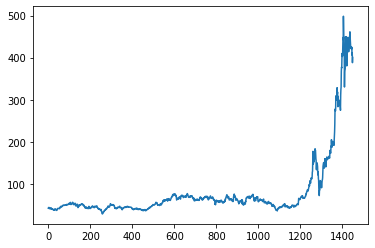

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
df1

0        42.188000
1        43.672001
2        43.709999
3        44.198002
4        43.472000
           ...    
1445    424.679993
1446    406.019989
1447    410.829987
1448    388.040009
1449    400.510010
Name: Close, Length: 1450, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.02865077]
 [0.031811  ]
 [0.03189192]
 ...
 [0.81368691]
 [0.76515485]
 [0.79171015]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[test_size:,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(942, 508)

In [ ]:
train_data

array([[0.02865077],
       [0.031811  ],
       [0.03189192],
       [0.03293114],
       [0.03138509],
       [0.0314362 ],
       [0.03092937],
       [0.02944296],
       [0.02521796],
       [0.02559702],
       [0.02584404],
       [0.02589089],
       [0.02897872],
       [0.03127862],
       [0.0271175 ],
       [0.02574182],
       [0.02559275],
       [0.02705362],
       [0.02541387],
       [0.02285417],
       [0.02380394],
       [0.02503056],
       [0.02425967],
       [0.0213848 ],
       [0.02010707],
       [0.01986856],
       [0.02132517],
       [0.020188  ],
       [0.01917008],
       [0.02215995],
       [0.02174681],
       [0.02429374],
       [0.02213865],
       [0.02317361],
       [0.02383376],
       [0.02472391],
       [0.02156368],
       [0.0199069 ],
       [0.01760274],
       [0.01997504],
       [0.01920841],
       [0.01870584],
       [0.02015818],
       [0.02531166],
       [0.02537555],
       [0.02725805],
       [0.02828875],
       [0.028

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(841, 100)
(841,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(407, 100)
(407,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_15 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_16 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_17 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 4s 250ms/step - loss: 7.2498e-04 - val_loss: 0.0544
Epoch 2/100
14/14 [==============================] - 3s 188ms/step - loss: 2.3087e-04 - val_loss: 0.0173
Epoch 3/100
14/14 [==============================] - 3s 183ms/step - loss: 9.6572e-05 - val_loss: 0.0079
Epoch 4/100
14/14 [==============================] - 3s 185ms/step - loss: 7.9923e-05 - val_loss: 0.0101
Epoch 5/100
14/14 [==============================] - 3s 192ms/step - loss: 7.5270e-05 - val_loss: 0.0077
Epoch 6/100
14/14 [==============================] - 3s 199ms/step - loss: 7.5150e-05 - val_loss: 0.0086
Epoch 7/100
14/14 [==============================] - 3s 191ms/step - loss: 7.2188e-05 - val_loss: 0.0055
Epoch 8/100
14/14 [==============================] - 3s 191ms/step - loss: 6.9868e-05 - val_loss: 0.0069
Epoch 9/100
14/14 [==============================] - 3s 191ms/step - loss: 6.8779e-05 - val_loss: 0.0056
Epoch 10/100
14/14 [==============================] - 3

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

56.7160437732518

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

178.3608792453233

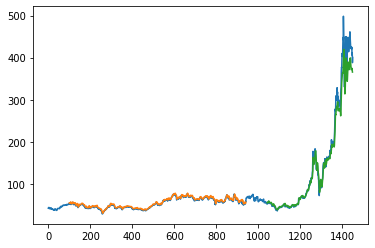

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

508

In [ ]:
x_input=test_data[len(test_data)-100:].reshape(1,-1)
x_input.shape


(1, 100)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.33715229538802394,
 0.36084123144810054,
 0.3571060311384998,
 0.36122030797538907,
 0.36640360921406645,
 0.3651003021308322,
 0.36229784583938796,
 0.36547512192701526,
 0.34804273574437905,
 0.358745782449708,
 0.3475699786386428,
 0.3686992220568013,
 0.39870865644329023,
 0.4156682530260595,
 0.45358675879451293,
 0.522975570071848,
 0.5307610987693664,
 0.5205478685883257,
 0.5326436137301006,
 0.5966872705043639,
 0.5764183416873102,
 0.5848257430557737,
 0.5972665108759946,
 0.5779430962704133,
 0.5780282958807811,
 0.6385752592638643,
 0.6067855364514302,
 0.6169945423954962,
 0.5832371700002211,
 0.5423202358388253,
 0.594536484001602,
 0.5676574691664514,
 0.5772914589758615,
 0.5723424079244995,
 0.5481807472528172,
 0.5712819294790524,
 0.5721337306179466,
 0.5712904429412632,
 0.5732325521374722,
 0.5575293736075172,
 0.5429889000577984,
 0.5241723289009267,
 0.6009931977233848,
 0.629205316759507,
 0.6418589861232555,
 0.7206219641419226,
 0.7425349010012898,
 0.73888

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0

while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.69173104]
101
1 day input [0.36084123 0.35710603 0.36122031 0.36640361 0.3651003  0.36229785
 0.36547512 0.34804274 0.35874578 0.34756998 0.36869922 0.39870866
 0.41566825 0.45358676 0.52297557 0.5307611  0.52054787 0.53264361
 0.59668727 0.57641834 0.58482574 0.59726651 0.5779431  0.5780283
 0.63857526 0.60678554 0.61699454 0.58323717 0.54232024 0.59453648
 0.56765747 0.57729146 0.57234241 0.54818075 0.57128193 0.57213373
 0.57129044 0.57323255 0.55752937 0.5429889  0.52417233 0.6009932
 0.62920532 0.64185899 0.72062196 0.7425349  0.73888912 0.79140347
 0.81191091 0.79667194 0.80056474 0.85586026 0.89230938 0.88151262
 1.         0.95044567 0.89150015 0.80553082 0.82963717 0.64200378
 0.71881614 0.72959158 0.73253035 0.83240554 0.89658977 0.87955349
 0.84051907 0.88038397 0.89580185 0.84222273 0.74879996 0.76462246
 0.80625485 0.83577024 0.83123432 0.85240191 0.8931825  0.82275875
 0.84531052 0.820395   0.84450129 0.84582165 0.86302827 0.88070339
 0.88996688 0.92116456 0.89471577 0

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1450

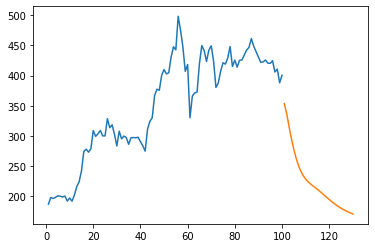

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

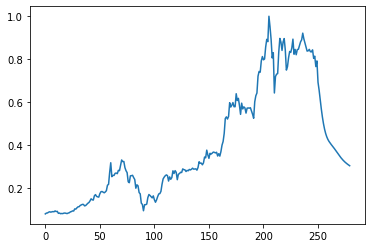

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

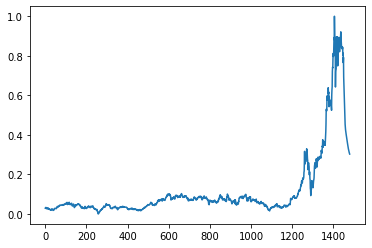

In [ ]:
plt.plot(df3)